In [3]:
print(1+2)

3


In [ ]:
# Completion mode, 지시와 명령을 하나의 prompt로 젂달 
import os 
import openai 
openai.api_key = os.getenv("OPENAI_API_KEY") 
# 텍스트 생성 요청을 보냅니다. 
response = openai.completions.create( 
model="gpt-3.5-turbo-instruct",  
prompt="키가클려면", 
max_tokens=256,  # 생성된 텍스트의 최대 길이를 설정합니다. 
) 
# 생성된 텍스트를 출력합니다. 
print(response.choices[0].text)



こんにちは？今日の天気は本当にいいですね！


In [4]:
import openai 

res = openai.chat.completions.create( 
model="gpt-4o-mini", 
messages=[{"role": "user", "content": "다음을 일본어로 번역하세요: 안녕하세요? 오늘 날씨가 참 좋굮요!"}], 
temperature=0.5, 
max_tokens=256, 
top_p=1, 
frequency_penalty=0, 
presence_penalty=0 
) 
print(res.choices[0].message.content)

안녕하세요? 오늘 날씨가 참 좋군요!의 일본어 번역은 다음과 같습니다:

こんにちは！今日は本当にいい天気ですね！


실습: 삼성전자의 주가 데이터를 가져와서 분석하는 ChatGPT 어플리케이션을 작성하시오(힌트: pykrx 패키지)
실습: 사용자가 입력한 질문에 맞는 캠핑장을 검색해서 추천하는 ChatGPT 어플리케이션을 작성하시오(힌트: 고캠핑 API) -> 10~30분 필요 (가이드에 따름)


In [5]:
pip install pykrx pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 50.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 88.9 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 82.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 KB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 91.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 93.6 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 89.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 57

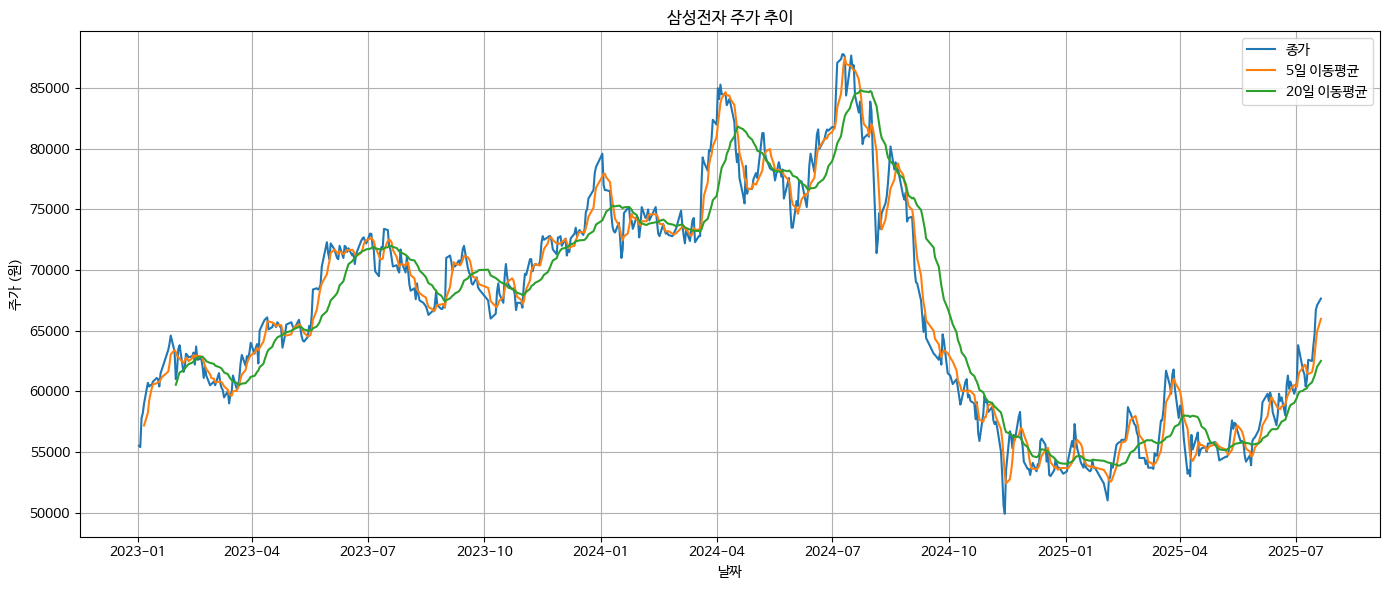


📘 삼성전자 주가 요약 ( 2025-07-21 )
현재 종가는 67,650원이며, 전일 대비 상승하였습니다 (0.82%).
📈 단기 이동평균선이 장기 이동평균선 위에 있어, 기술적으로는 상승 추세로 해석됩니다.


/tmp/ipykernel_20756/3999420678.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  latest_price = df['종가'][-1]
/tmp/ipykernel_20756/3999420678.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price_change = df['수익률(%)'][-1]
/tmp/ipykernel_20756/3999420678.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ma5 = df['5일 이동평균'][-1]
/tmp/ipykernel_20756/3999420678.py:36: FutureWarning: Series.__getitem__ treating keys as positio

In [7]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# 🗓️ 1. 날짜 설정
start_date = "2023-01-01"
end_date = datetime.datetime.today().strftime("%Y-%m-%d")

# 📈 2. 삼성전자 주가 데이터 가져오기
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")
df = df[['시가', '고가', '저가', '종가', '거래량']]

# 🧮 3. 분석 데이터 추가
df['수익률(%)'] = df['종가'].pct_change() * 100
df['5일 이동평균'] = df['종가'].rolling(window=5).mean()
df['20일 이동평균'] = df['종가'].rolling(window=20).mean()

# 📊 4. 차트 그리기
plt.figure(figsize=(14, 6))
plt.plot(df['종가'], label='종가')
plt.plot(df['5일 이동평균'], label='5일 이동평균')
plt.plot(df['20일 이동평균'], label='20일 이동평균')
plt.title('삼성전자 주가 추이')
plt.xlabel('날짜')
plt.ylabel('주가 (원)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🧠 5. ChatGPT 스타일 해석
latest_price = df['종가'][-1]
price_change = df['수익률(%)'][-1]
ma5 = df['5일 이동평균'][-1]
ma20 = df['20일 이동평균'][-1]

print("\n📘 삼성전자 주가 요약 (", end_date, ")")
print(f"현재 종가는 {latest_price:,.0f}원이며, 전일 대비 {'상승' if price_change > 0 else '하락'}하였습니다 ({price_change:.2f}%).")
if ma5 > ma20:
    print("📈 단기 이동평균선이 장기 이동평균선 위에 있어, 기술적으로는 상승 추세로 해석됩니다.")
else:
    print("📉 단기 이동평균선이 장기 이동평균선 아래에 있어, 기술적으로는 하락 추세로 해석됩니다.")

In [8]:
pip install streamlit pykrx pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.3/9.9 MB 5.1 kB/s eta 0:31:38
ERROR: Exception:
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/usr/lib/python3/dist-packages/pip/_vendor/urllib3/response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "/usr/lib/python3/dist-packages/pip/_vendor/cachecontrol/filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "/usr/lib/python3.10/http/client.py", line 466, in read
    s = self.fp.read(amt)
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "/usr/lib/python3.10/ssl.py", line 1303, in recv_into
    return self.read(nbytes, buffer)
  File "/usr/lib/python3.10/ssl.py", line 1159, in read
    return self._sslobj.read(len, buffer)
TimeoutError: The read

In [9]:
pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 61.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 KB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.1/321.1 KB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 MB 47.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.6/207.6 KB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.2/731.2 KB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.5/375.5 KB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.5/149.5 KB 40.2 MB/s eta 0:00:00
Note:

In [10]:
pip install streamlit -i https://ftp.kaist.ac.kr/pypi/simple/

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://ftp.kaist.ac.kr/pypi/simple/
Note: you may need to restart the kernel to use updated packages.


2025-07-21 15:11:21.307 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-21 15:11:21.308 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-21 15:11:21.383 
  command:

    streamlit run /home/ubuntu/.local/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-07-21 15:11:21.383 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-21 15:11:21.383 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-21 15:11:21.384 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-21 15:11:21.384 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored whe

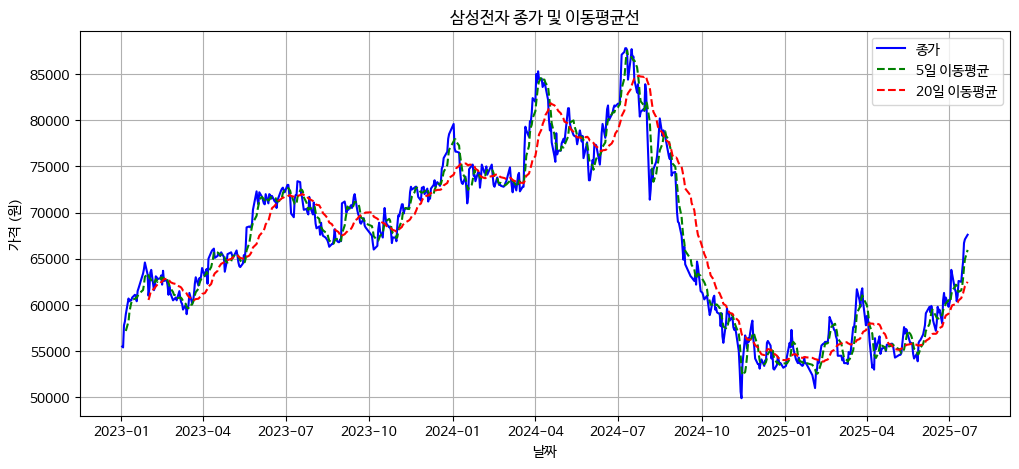

In [11]:
import streamlit as st
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt
import datetime

st.set_page_config(page_title="삼성전자 주가 분석기", layout="wide")

# 🌐 타이틀
st.title("📈 삼성전자 주가 분석 어플리케이션")
st.markdown("pykrx 데이터를 기반으로 삼성전자의 최근 주가를 분석합니다.")

# 📅 날짜 입력
col1, col2 = st.columns(2)
with col1:
    start_date = st.date_input("시작일", datetime.date(2023, 1, 1))
with col2:
    end_date = st.date_input("종료일", datetime.date.today())

if start_date >= end_date:
    st.error("⛔ 종료일은 시작일보다 이후여야 합니다.")
    st.stop()

# 🧾 데이터 가져오기
df = stock.get_market_ohlcv_by_date(start_date.strftime("%Y%m%d"), end_date.strftime("%Y%m%d"), "005930")
df = df[['시가', '고가', '저가', '종가', '거래량']]
df['수익률(%)'] = df['종가'].pct_change() * 100
df['5일 이동평균'] = df['종가'].rolling(window=5).mean()
df['20일 이동평균'] = df['종가'].rolling(window=20).mean()

# 📊 차트 출력
st.subheader("📊 주가 및 이동평균선 차트")
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df.index, df['종가'], label='종가', color='blue')
ax.plot(df.index, df['5일 이동평균'], label='5일 이동평균', color='green', linestyle='--')
ax.plot(df.index, df['20일 이동평균'], label='20일 이동평균', color='red', linestyle='--')
ax.set_title("삼성전자 종가 및 이동평균선")
ax.set_xlabel("날짜")
ax.set_ylabel("가격 (원)")
ax.legend()
ax.grid(True)
st.pyplot(fig)

# 📘 자연어 해석
st.subheader("🤖 ChatGPT 스타일 분석 결과")

latest_price = df['종가'][-1]
price_change = df['수익률(%)'][-1]
ma5 = df['5일 이동평균'][-1]
ma20 = df['20일 이동평균'][-1]

st.markdown(f"""
- **현재 종가**는 **{latest_price:,.0f}원**입니다.
- 전일 대비 **{'상승' if price_change > 0 else '하락'}**하였으며, **{price_change:.2f}%** 변화가 있었습니다.
- 기술적으로는 {"📈 상승 추세로 해석됩니다." if ma5 > ma20 else "📉 하락 추세로 해석됩니다."}
""")

# 📥 원시 데이터 확인
with st.expander("📂 원시 주가 데이터 보기"):
    st.dataframe(df.tail(30))